###Importing Libraries

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

## **Analysis of Dataset and Pre-Processing**

In [232]:
bitcoin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRML_individual_project/Copy of bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv')
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [233]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [234]:
bitcoin = bitcoin.replace('-',np.nan)

In [235]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1313 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [236]:
bitcoin['Volume'] = bitcoin['Volume'].str.replace(',','').astype(float)
bitcoin['Market Cap'] = bitcoin['Market Cap'].str.replace(',','').astype(float)

bitcoin['Volume'] = bitcoin['Volume'].fillna(bitcoin['Volume'].mean())
bitcoin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   float64
 6   Market Cap  1556 non-null   float64
dtypes: float64(6), object(1)
memory usage: 85.2+ KB


In [237]:
bitcoin.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1556.000000,1556.000000,1556.000000,1556.000000,1.556000e+03,1.556000e+03
mean,582.625328,597.992847,567.851446,584.239396,1.481643e+08,8.694353e+09
std,523.137312,542.992855,505.877401,525.904442,2.978838e+08,8.707288e+09
min,68.500000,74.560000,65.530000,68.430000,2.857830e+06,7.792550e+08
25%,254.287500,260.327500,248.835000,254.320000,2.322780e+07,3.598355e+09
50%,438.600000,447.560000,430.570000,438.855000,5.814580e+07,6.386210e+09
75%,662.437500,674.525000,646.735000,663.402500,1.481643e+08,9.898830e+09
max,2953.220000,2999.910000,2840.530000,2958.110000,2.569530e+09,4.839120e+10


In [238]:
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,1.481643e+08,1.292190e+09
1552,"May 01, 2013",139.00,139.89,107.72,116.99,1.481643e+08,1.542820e+09
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,1.481643e+08,1.597780e+09
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,1.481643e+08,1.491160e+09


In [239]:
bitcoin['Date'][242:249]

242    Dec 01, 2016
243    Nov 30, 2016
244    Nov 29, 2016
245    Nov 28, 2016
246    Nov 27, 2016
247    Nov 26, 2016
248    Nov 25, 2016
Name: Date, dtype: object

In [240]:
d = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6','Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}

In [241]:
def date_change(data):
  temp = []
  for i in range(len(data)):
    s = d[data[i][:3]] + '' + data[i][3:]
    temp.append(s)
  return temp
temp_date = date_change(bitcoin['Date'])
bitcoin['Date'] = temp_date
bitcoin['Date'] = bitcoin['Date'].str.replace(',','')
bitcoin



,Date,Open,High,Low,Close,Volume,Market Cap
0,7 31 2017,2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,7 30 2017,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,7 29 2017,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,7 28 2017,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,7 27 2017,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
...,...,...,...,...,...,...,...
1551,5 02 2013,116.38,125.60,92.28,105.21,1.481643e+08,1.292190e+09
1552,5 01 2013,139.00,139.89,107.72,116.99,1.481643e+08,1.542820e+09
1553,4 30 2013,144.00,146.93,134.05,139.00,1.481643e+08,1.597780e+09
1554,4 29 2013,134.44,147.49,134.00,144.54,1.481643e+08,1.491160e+09


In [242]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%m %d %Y')

In [243]:
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,1.481643e+08,1.292190e+09
1552,2013-05-01,139.00,139.89,107.72,116.99,1.481643e+08,1.542820e+09
1553,2013-04-30,144.00,146.93,134.05,139.00,1.481643e+08,1.597780e+09
1554,2013-04-29,134.44,147.49,134.00,144.54,1.481643e+08,1.491160e+09


## **Exploratory Data Analysis**

In [244]:

y_overall = bitcoin.loc[(bitcoin['Date'] >= '2014-09-17')
                     & (bitcoin['Date'] <= '2022-02-19')]
y_overall
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']]
             )
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

In [180]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,526.429032,524.847849
February,561.684706,565.118471
March,606.584301,604.977312
April,622.280667,625.490667
May,854.049462,864.778065
June,1168.686333,1172.385000
July,1150.349462,1153.445914
August,417.113226,415.159839
September,417.840405,417.349324


In [181]:
closebit = bitcoin[['Date','Close']]
fig = px.line(closebit, x=closebit.Date, y=closebit.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2013-2017', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## **Analysis of Close stock** 

In [182]:
closedf = closebit[(closebit['Date'] >= '2016-01-01')  & (closebit['Date'] <= '2016-12-31')]
close_stock = closedf.copy()
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [183]:
closedf.shape

(366, 2)

In [184]:

closedf = closebit.iloc[:,1]
scaler = MinMaxScaler(feature_range = (0,1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1,1))
closedf

array([[0.97135669],
       [0.93046635],
       [0.91983195],
       ...,
       [0.02442139],
       [0.02633856],
       [0.02276377]])

In [185]:

train = closebit[(closebit['Date'] <= '2016-12-31')].iloc[::-1].reset_index(drop=True)

test = closebit[(closebit['Date'] > '2016-12-31')].iloc[::-1].reset_index(drop=True)
train

,Date,Close
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21
...,...,...
1339,2016-12-27,933.20
1340,2016-12-28,975.92
1341,2016-12-29,973.50
1342,2016-12-30,961.24


In [186]:
train_close = scaler.fit_transform(np.array(train.iloc[:,1]).reshape(-1,1))
test_close = scaler.fit_transform(np.array(test.iloc[:,1]).reshape(-1,1))
test_close.shape,train_close.shape

((212, 1), (1344, 1))

In [187]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
X_train,y_train = create_dataset(train_close,15)
X_test,y_test = create_dataset(test_close,15)



### Predictions of Close stock Year 2017 using random Forest Regressor

In [188]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
closer_r = r2_score(y_test,pred)
closem_r = mean_squared_error(y_test,pred)
print('R2-score of close stock for Random Forest Regressor: ',closer_r)
print('Mean Squared Error of close stock for Random Forest Regressor: ',closem_r)


R2-score of close stock for Random Forest Regressor:  0.9751746613947124
Mean Squared Error of close stock for Random Forest Regressor:  0.0024228578538561937


Text(0.5, 1.0, 'actual and predicted value of close for Random Forest Regressor')

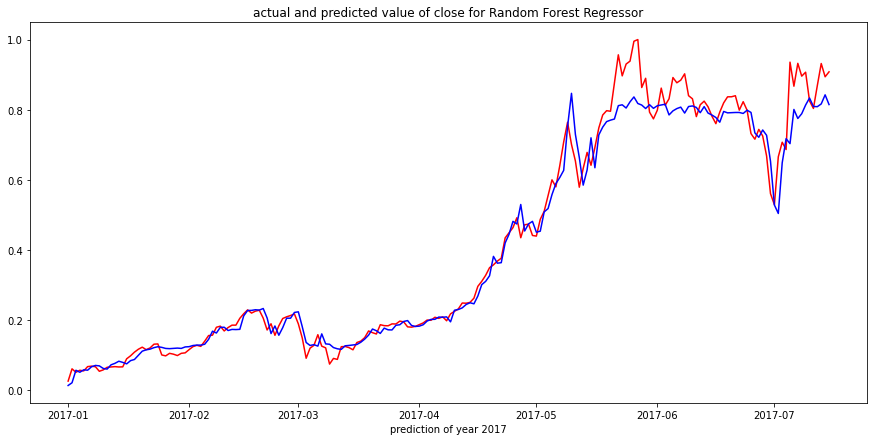

In [189]:
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of close')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of close')
plt.xlabel('prediction of year 2017')
plt.title('actual and predicted value of close for Random Forest Regressor')

###Predictions of Close stock Year 2017 using Linear Regressor

In [190]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
closer_l = r2_score(y_test,pred)
closem_l = mean_squared_error(y_test,pred)
print('R2-score of close stock for Linear Regressor: ',closer_l)
print('Mean Squared Error of close stock for Linear Regressor: ',closem_l)

R2-score of close stock for Linear Regressor:  0.9838892663618023
Mean Squared Error of close stock for Linear Regressor:  0.0015723458256629275


Text(0.5, 1.0, 'actual and predicted value of close for Linear Regressor')

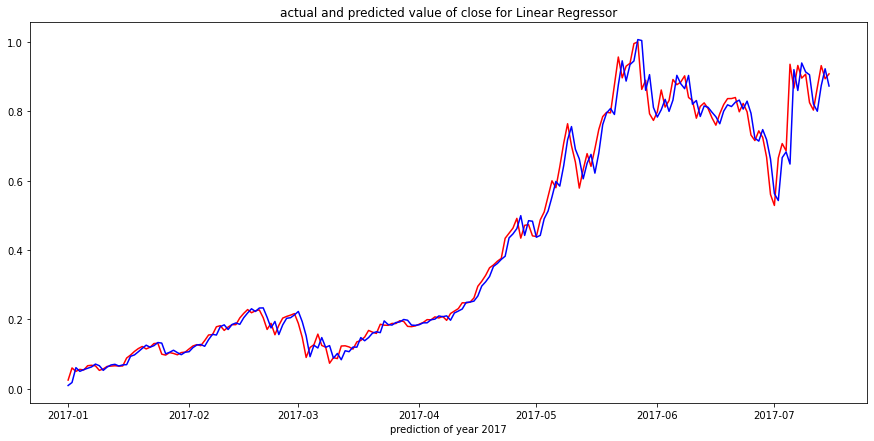

In [191]:
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of close')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of close')
plt.xlabel('prediction of year 2017')
plt.title('actual and predicted value of close for Linear Regressor')

## **Analysis of Open Stock**

In [192]:
openbit = bitcoin[['Date','Open']]
fig = px.line(openbit, x=openbit.Date, y=openbit.Open,labels={'date':'Date','Open':'Open Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin open price 2013-2017', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [193]:
opendf = openbit[(openbit['Date'] >= '2016-01-01')  & (openbit['Date'] <= '2016-12-31')]
open_stock = opendf.copy()
fig = px.line(opendf, x=opendf.Date, y=opendf.Open,labels={'date':'Date','open':'open Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin open price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [194]:
opendf = openbit.iloc[:,1]
scaler = MinMaxScaler(feature_range = (0,1))
opendf = scaler.fit_transform(np.array(opendf).reshape(-1,1))
train = openbit[(openbit['Date'] <= '2016-12-31')].iloc[::-1].reset_index(drop=True)
test = openbit[(openbit['Date'] > '2016-12-31')].iloc[::-1].reset_index(drop=True)
train_open = scaler.fit_transform(np.array(train.iloc[:,1]).reshape(-1,1))
test_open = scaler.fit_transform(np.array(test.iloc[:,1]).reshape(-1,1))
X_train,y_train = create_dataset(train_open,15)
X_test,y_test = create_dataset(test_open,15)

### Predictions of Open stock Year 2017 using random Forest Regressor

R2-score of Open stock for Random Forest Regressor:  0.976524342876003
Mean Squared Error of Open stock for Random Forest Regressor:  0.002289122599889249





Text(0.5, 1.0, 'actual and predicted value of open for Random Forest Regressor')

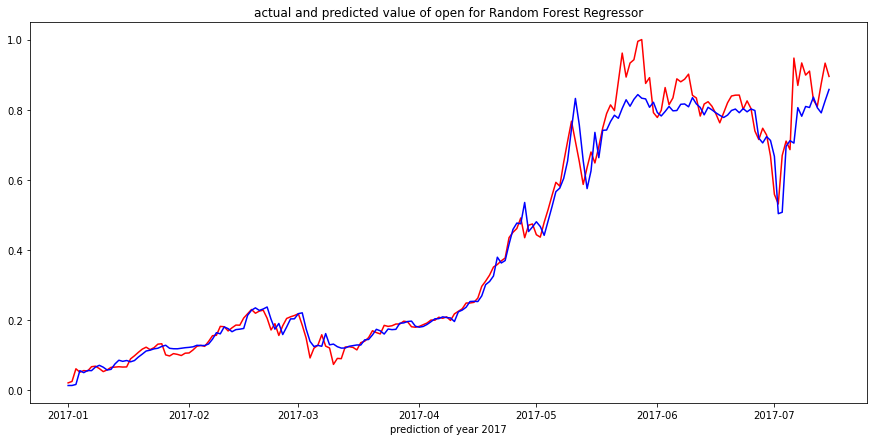

In [195]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
openr_r = r2_score(y_test,pred)
openm_r = mean_squared_error(y_test,pred)
print('R2-score of Open stock for Random Forest Regressor: ',openr_r)
print('Mean Squared Error of Open stock for Random Forest Regressor: ',openm_r)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of open')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of open')
plt.xlabel('prediction of year 2017')
plt.title('actual and predicted value of open for Random Forest Regressor')

###Predictions of Open stock Year 2017 using Linear Regressor

R2-score of Open stock for Linear Regressor:  0.983855894748969
Mean Squared Error of Open stock for Linear Regressor:  0.0015742194559209713





Text(0.5, 1.0, 'actual and predicted value of open for Linear Regressor')

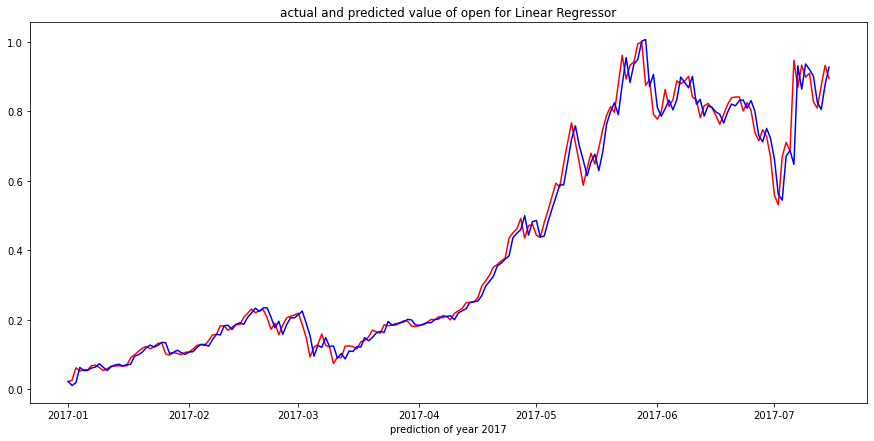

In [196]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
openr_l = r2_score(y_test,pred)
openm_l = mean_squared_error(y_test,pred)
print('R2-score of Open stock for Linear Regressor: ',openr_l)
print('Mean Squared Error of Open stock for Linear Regressor: ',openm_l)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of open')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of open')
plt.xlabel('prediction of year 2017')
plt.title('actual and predicted value of open for Linear Regressor')

##**Analysis of High Stock**

In [197]:
Highbit = bitcoin[['Date','High']]
fig = px.line(Highbit, x=Highbit.Date, y=Highbit.High,labels={'date':'Date','High':'High Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin High price 2013-2017', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [198]:
Highdf = Highbit[(Highbit['Date'] >= '2016-01-01')  & (Highbit['Date'] <= '2016-12-31')]
High_stock = Highdf.copy()
fig = px.line(Highdf, x=Highdf.Date, y=Highdf.High,labels={'date':'Date','High':'High Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin High price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [199]:
Highdf = Highbit.iloc[:,1]
scaler = MinMaxScaler(feature_range = (0,1))
Highdf = scaler.fit_transform(np.array(Highdf).reshape(-1,1))
train = Highbit[(Highbit['Date'] <= '2016-12-31')].iloc[::-1].reset_index(drop=True)
test = Highbit[(Highbit['Date'] > '2016-12-31')].iloc[::-1].reset_index(drop=True)
train_High = scaler.fit_transform(np.array(train.iloc[:,1]).reshape(-1,1))
test_High = scaler.fit_transform(np.array(test.iloc[:,1]).reshape(-1,1))
X_train,y_train = create_dataset(train_High,15)
X_test,y_test = create_dataset(test_High,15)

###Predictions of High stock Year 2017 using random Forest Regressor

R2-score of High stock for Random Forest Regressor:  0.983439346284942
Mean Squared Error of High stock for Random Forest Regressor:  0.0017833351827924357





Text(0.5, 1.0, 'actual and predicted value of High for Random Forest Regressor')

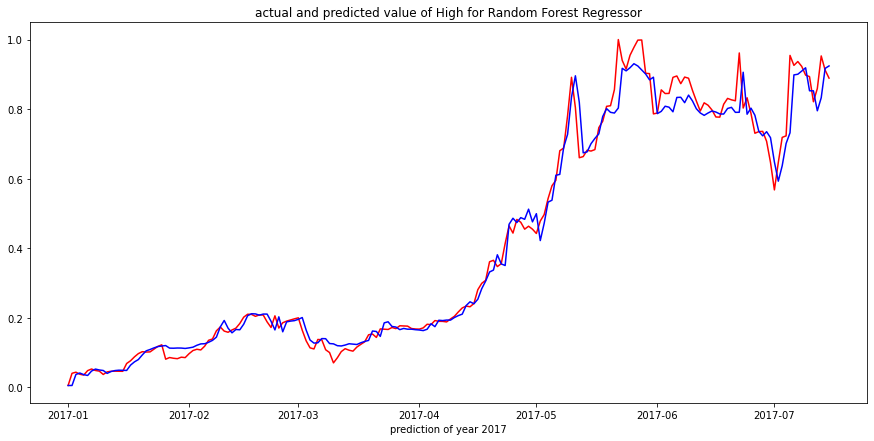

In [200]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
highr_r = r2_score(y_test,pred)
highm_r = mean_squared_error(y_test,pred)
print('R2-score of High stock for Random Forest Regressor: ',highr_r)
print('Mean Squared Error of High stock for Random Forest Regressor: ',highm_r)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of High')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of High')
plt.xlabel('prediction of year 2017')
plt.title('actual and predicted value of High for Random Forest Regressor')

###Predictions of High stock Year 2017 using Linear Regressor

R2-score of High stock for Linear Regressor:  0.9831367966443475
Mean Squared Error of High stock for Linear Regressor:  0.0018159152625342643





Text(0.5, 1.0, 'actual and predicted value of High for Linear Regressor')

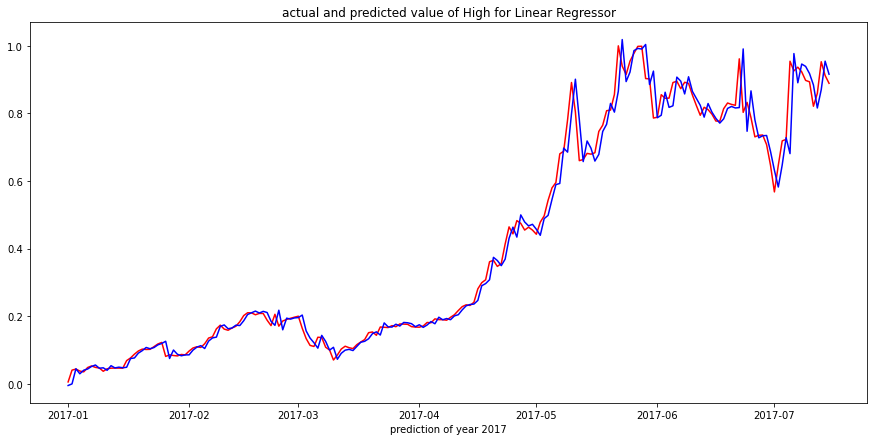

In [201]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
highr_l = r2_score(y_test,pred)
highm_l = mean_squared_error(y_test,pred)
print('R2-score of High stock for Linear Regressor: ',highr_l)
print('Mean Squared Error of High stock for Linear Regressor: ',highm_l)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of High')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of High')
plt.xlabel('prediction of year 2017')
plt.title('actual and predicted value of High for Linear Regressor')

##**Analysis of Low Stock**

In [202]:
Lowbit = bitcoin[['Date','Low']]
fig = px.line(Lowbit, x=Lowbit.Date, y=Lowbit.Low,labels={'date':'Date','Low':'Low Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin Low price 2013-2017', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [203]:
Lowdf = Lowbit[(Lowbit['Date'] >= '2016-01-01')  & (Lowbit['Date'] <= '2016-12-31')]
Low_stock = Lowdf.copy()
fig = px.line(Lowdf, x=Lowdf.Date, y=Lowdf.Low,labels={'date':'Date','Low':'Low Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin Low price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [204]:
Lowdf = Lowbit.iloc[:,1]
scaler = MinMaxScaler(feature_range = (0,1))
Lowdf = scaler.fit_transform(np.array(Lowdf).reshape(-1,1))
train = Lowbit[(Lowbit['Date'] <= '2016-12-31')].iloc[::-1].reset_index(drop=True)
test = Lowbit[(Lowbit['Date'] > '2016-12-31')].iloc[::-1].reset_index(drop=True)
train_Low = scaler.fit_transform(np.array(train.iloc[:,1]).reshape(-1,1))
test_Low = scaler.fit_transform(np.array(test.iloc[:,1]).reshape(-1,1))
X_train,y_train = create_dataset(train_Low,15)
X_test,y_test = create_dataset(test_Low,15)

###Predictions of Low stock Year 2017 using random Forest Regressor

R2-score of Low stock for Random Forest Regressor:  0.9730614470171944
Mean Squared Error of Low stock for Random Forest Regressor:  0.0025995992381698434





Text(0.5, 1.0, 'actual and predicted value of Low for Random Forest Regressor')

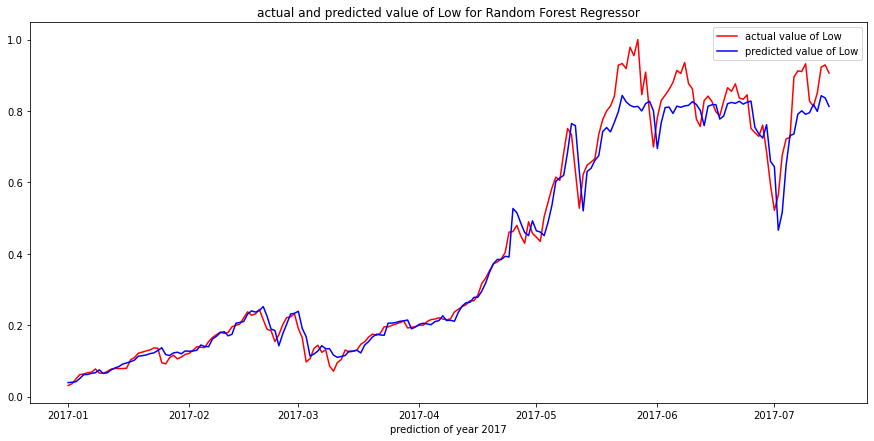

In [205]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
lowr_r = r2_score(y_test,pred)
lowm_r = mean_squared_error(y_test,pred)
print('R2-score of Low stock for Random Forest Regressor: ',lowr_r)
print('Mean Squared Error of Low stock for Random Forest Regressor: ',lowm_r)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of Low')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of Low')
plt.xlabel('prediction of year 2017')
plt.legend()
plt.title('actual and predicted value of Low for Random Forest Regressor')

###Predictions of Low stock Year 2017 using Linear Regressor

R2-score of Low stock for Linear Regressor:  0.9831074168641207
Mean Squared Error of Low stock for Linear Regressor:  0.0016301523797058477





Text(0.5, 1.0, 'actual and predicted value of Low for Linear Regressor')

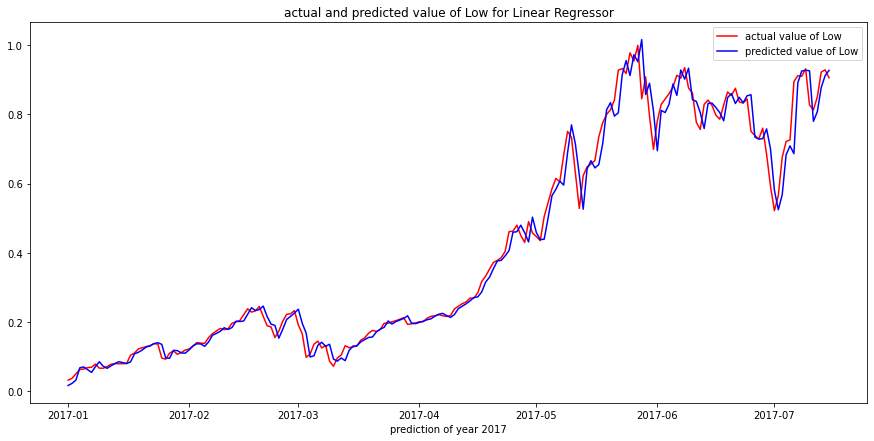

In [206]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
lowr_l = r2_score(y_test,pred)
lowm_l = mean_squared_error(y_test,pred)
print('R2-score of Low stock for Linear Regressor: ',lowr_l)
print('Mean Squared Error of Low stock for Linear Regressor: ',lowm_l)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of Low')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of Low')
plt.xlabel('prediction of year 2017')
plt.legend()
plt.title('actual and predicted value of Low for Linear Regressor')

##**Analysis of Volume**

In [207]:
Volumebit = bitcoin[['Date','Volume']]
fig = px.line(Volumebit, x=Volumebit.Date, y=Volumebit.Volume,labels={'date':'Date','Volume':'Volume Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin Volume 2013-2017', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [208]:
Volumedf = Volumebit[(Volumebit['Date'] >= '2016-01-01')  & (Volumebit['Date'] <= '2016-12-31')]
Low_stock = Volumedf.copy()
fig = px.line(Volumedf, x=Volumedf.Date, y=Volumedf.Volume,labels={'date':'Date','Volume':'Volume Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin Volume price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [209]:
Volumedf = Volumebit.iloc[:,1]
scaler = MinMaxScaler(feature_range = (0,1))
Volumedf = scaler.fit_transform(np.array(Volumedf).reshape(-1,1))
train = Volumebit[(Volumebit['Date'] <= '2016-12-31')].iloc[::-1].reset_index(drop=True)
test = Volumebit[(Volumebit['Date'] > '2016-12-31')].iloc[::-1].reset_index(drop=True)
train_Volume = scaler.fit_transform(np.array(train.iloc[:,1]).reshape(-1,1))
test_Volume = scaler.fit_transform(np.array(test.iloc[:,1]).reshape(-1,1))
X_train,y_train = create_dataset(train_Volume,15)
X_test,y_test = create_dataset(test_Volume,15)

###Predictions of Volume of Year 2017 using random Forest Regressor

R2-score of Volume stock for Random Forest Regressor:  0.7904472530819766
Mean Squared Error of Volume stock for Random Forest Regressor:  0.010936367654018977





Text(0.5, 1.0, 'actual and predicted value of Volume for Random Forest Regressor')

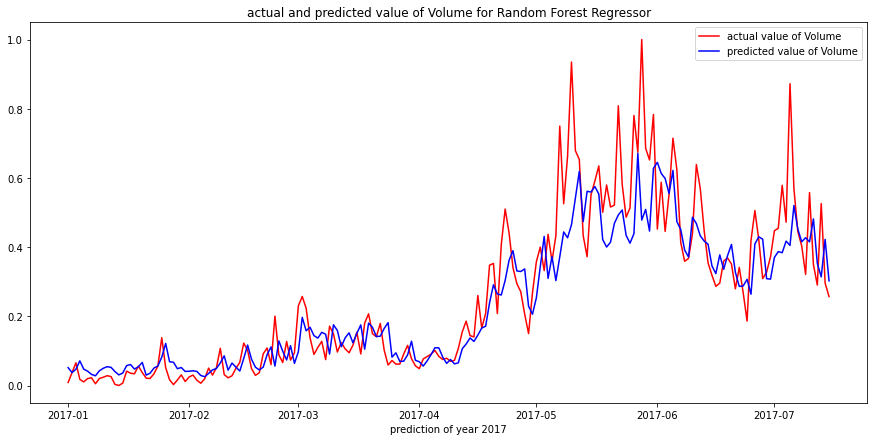

In [210]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
volr_r = r2_score(y_test,pred)
volm_r = mean_squared_error(y_test,pred)
print('R2-score of Volume stock for Random Forest Regressor: ',volr_r)
print('Mean Squared Error of Volume stock for Random Forest Regressor: ',volm_r)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of Volume')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of Volume')
plt.xlabel('prediction of year 2017')
plt.legend()
plt.title('actual and predicted value of Volume for Random Forest Regressor')

###Predictions of Volume of Year 2017 using Linear Regressor

R2-score of close stock for Linear Regressor:  0.8186028000709457
Mean Squared Error of close stock for Linear Regressor:  0.00946695521299844





Text(0.5, 1.0, 'actual and predicted value of Volume for Linear Regressor')

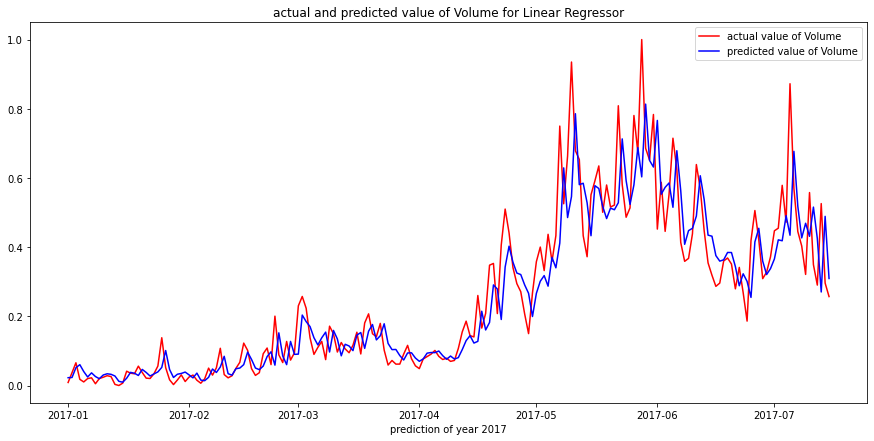

In [211]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
volr_l = r2_score(y_test,pred)
volm_l = mean_squared_error(y_test,pred)
print('R2-score of close stock for Linear Regressor: ',volr_l)
print('Mean Squared Error of close stock for Linear Regressor: ',volm_l)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of Volume')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of Volume')
plt.xlabel('prediction of year 2017')
plt.legend()
plt.title('actual and predicted value of Volume for Linear Regressor')

In [212]:
M_capbit = bitcoin[['Date','Market Cap']]
fig = px.line(M_capbit, x=M_capbit.Date, y=M_capbit['Market Cap'],labels={'date':'Date','Market Cap':'Market Cap Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin Market Cap 2013-2017', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##**Analysis of Market Cap**

In [213]:
Mcapdf = M_capbit[(M_capbit['Date'] >= '2016-01-01')  & (M_capbit['Date'] <= '2016-12-31')]
Mcap_stock = Mcapdf.copy()
fig = px.line(Mcapdf, x=Mcapdf.Date, y=Mcapdf['Market Cap'],labels={'date':'Date','Market Cap':'Market Cap Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin Volume price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [214]:
Mcapdf = M_capbit.iloc[:,1]
scaler = MinMaxScaler(feature_range = (0,1))
Mcapdf = scaler.fit_transform(np.array(Mcapdf).reshape(-1,1))
train = M_capbit[(M_capbit['Date'] <= '2016-12-31')].iloc[::-1].reset_index(drop=True)
test = M_capbit[(M_capbit['Date'] > '2016-12-31')].iloc[::-1].reset_index(drop=True)
train_Mcap = scaler.fit_transform(np.array(train.iloc[:,1]).reshape(-1,1))
test_Mcap = scaler.fit_transform(np.array(test.iloc[:,1]).reshape(-1,1))
X_train,y_train = create_dataset(train_Mcap,15)
X_test,y_test = create_dataset(test_Mcap,15)

###Predictions of Market Cap of Year 2017 using Random Forest Regressor

R2-score of Market Cap for Random Forest Regressor:  0.9672530102560993
Mean Squared Error of Market Cap for Random Forest Regressor:  0.003222016710100199





Text(0.5, 1.0, 'actual and predicted value of Market Cap for Random Forest Regressor')

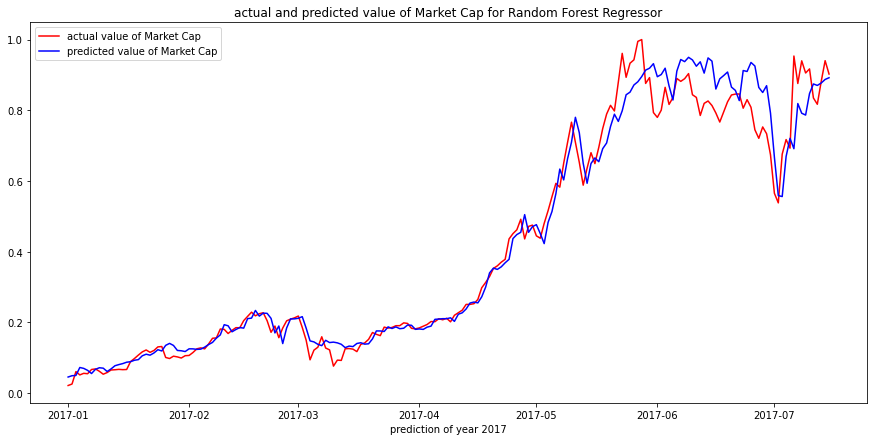

In [215]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mcr_r = r2_score(y_test,pred)
mcm_r = mean_squared_error(y_test,pred)
print('R2-score of Market Cap for Random Forest Regressor: ',mcr_r)
print('Mean Squared Error of Market Cap for Random Forest Regressor: ',mcm_r)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of Market Cap')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of Market Cap')
plt.xlabel('prediction of year 2017')
plt.legend()
plt.title('actual and predicted value of Market Cap for Random Forest Regressor')

###Predictions of Market Cap Year 2017 using Linear Regressor

R2-score of Market Cap for Linear Regressor:  0.9842640017242529
Mean Squared Error of Market Cap for Linear Regressor:  0.0015482842786796497





Text(0.5, 1.0, 'actual and predicted value of Market Cap for Linear Regressor')

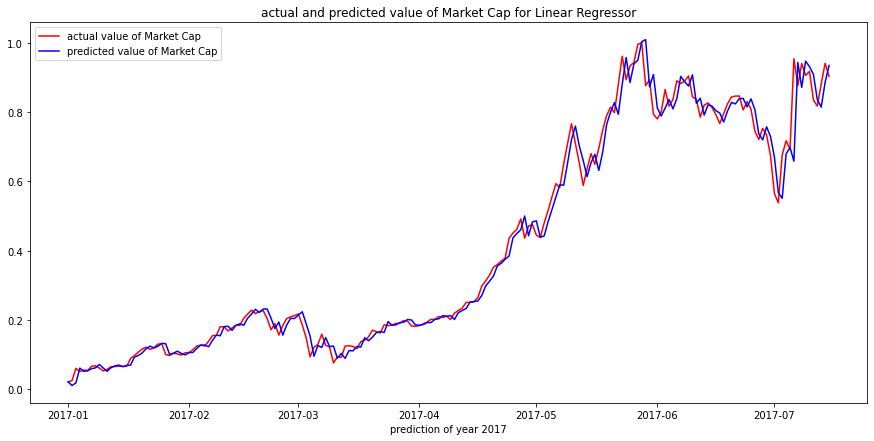

In [216]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
mcr_l = r2_score(y_test,pred)
mcm_l = mean_squared_error(y_test,pred)
print('R2-score of Market Cap for Linear Regressor: ',mcr_l)
print('Mean Squared Error of Market Cap for Linear Regressor: ',mcm_l)
print('\n\n')
plt.figure(figsize=(15,7))
plt.plot(test['Date'][:len(y_test)],y_test,color='r',label='actual value of Market Cap')
plt.plot(test['Date'][:len(y_test)],pred,color='b',label='predicted value of Market Cap')
plt.xlabel('prediction of year 2017')
plt.legend()
plt.title('actual and predicted value of Market Cap for Linear Regressor')

##R2-score and MSE for RandomForest Regressor

In [217]:
scores_r = pd.DataFrame()
scores_r.index = ['R2-score','Mean-squared-error']

In [219]:
scores_r['Close'] = [closer_r,closem_r]
scores_r['Open'] = [openr_r,openm_r]
scores_r['High'] = [highr_r,highm_r]
scores_r['Low'] = [lowr_r,lowm_r]
scores_r['Volume'] = [volr_r,volm_r]
scores_r['Market Cap'] = [mcr_r,mcm_r]

scores_r

,Close,Open,High,Low,Volume,Market Cap
R2-score,0.975175,0.976524,0.983439,0.973061,0.790447,0.967253
Mean-squared-error,0.002423,0.002289,0.001783,0.002600,0.010936,0.003222


In [220]:
display(scores_r.style.background_gradient(axis=1,cmap='Spectral'))

,Close,Open,High,Low,Volume,Market Cap
R2-score,0.975175,0.976524,0.983439,0.973061,0.790447,0.967253
Mean-squared-error,0.002423,0.002289,0.001783,0.002600,0.010936,0.003222


##R2-score and MSE for Linear Regressor

In [221]:
scores = pd.DataFrame()
scores.index = ['R2-score','Mean-squared-error']
scores['Close'] = [closer_l,closem_l]
scores['Open'] = [openr_l,openm_l]
scores['High'] = [highr_l,highm_l]
scores['Low'] = [lowr_l,lowm_l]
scores['Volume'] = [volr_l,volm_l]
scores['Market Cap'] = [mcr_l,mcm_l]
display(scores.style.background_gradient(axis=1,cmap='Spectral'))

,Close,Open,High,Low,Volume,Market Cap
R2-score,0.983889,0.983856,0.983137,0.983107,0.818603,0.984264
Mean-squared-error,0.001572,0.001574,0.001816,0.001630,0.009467,0.001548


In [230]:
scores_t = scores.T
scores_t

,R2-score,Mean-squared-error
Close,0.983889,0.001572
Open,0.983856,0.001574
High,0.983137,0.001816
Low,0.983107,0.001630
Volume,0.818603,0.009467
Market Cap,0.984264,0.001548
